In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime
import glob

In [2]:
run_label = "2023-07-14-09-23-39_for_paper"
dataDir = "./data/02/%s" % run_label

In [7]:
# Load list of delay times.
delays_list = np.loadtxt("%s/delays.csv" % dataDir)

In [28]:
# Load other parameters.  Assume they are the same for all runs, so load only one.
with open("%s/params-00.json" % dataDir, "r") as f:
    params = json.load(f)["sysparams"]

In [3]:
# Load results from the runs.
f_list = sorted(glob.glob("%s/dynamics-??.csv" % dataDir))
tt_list = []
tempK_list = []
muC_list = []
muV_list = []
for f in f_list:
    dynamics_m = np.loadtxt(f, delimiter=",")
    tt_list.append(dynamics_m[:,0])
    tempK_list.append(dynamics_m[:,1])
    muC_list.append(dynamics_m[:,2])
    muV_list.append(dynamics_m[:,3])

In [32]:
# Save the data for plotting as a single file.
with open("%s/plot_data.txt" % dataDir, "w") as f:
    f.write("%-20s%10.3f\n" % ("eF[eV]", params["eF"]))
    f.write("%-20s%10.3f\n" % ("Teq[K]", params["tempK_eq"]))
    f.write("%-20s%10.3f\n" % ("Fpu[uJ/cm^2]", params["pu_fluenceSI"]))
    f.write("%-20s%10.3f\n" % ("Fpr[uJ/cm^2]", params["pr_fluenceSI"]))
    f.write("\n")
    for delay,tt,tempK_t,muC_t,muV_t in zip(delays_list, tt_list, tempK_list, muC_list, muV_list):
        f.write("%-10s%10.3f\n" % ("delay[ps]", delay * 1.0e-3))
        for yy,ll in zip([tt * 1.0e-3, tempK_t, muC_t, muV_t],["time[ps]", "Te[K]", "mu_C[eV]", "mu_V[eV]"]):
            f.write( ("%-10s" % ll) + ("".join(["%10.3f" % y for y in yy]) + "\n") )
        f.write("\n")

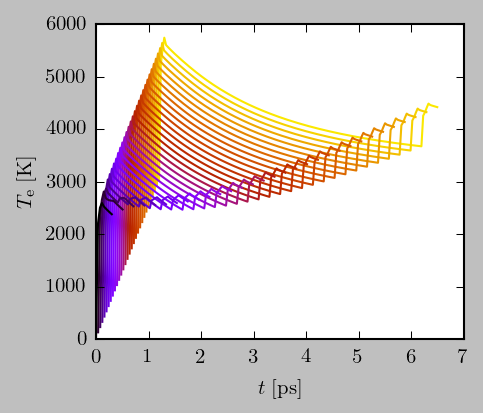

In [4]:
mpl.style.use(["classic", "latex"])
cmap = mpl.cm.get_cmap('gnuplot')
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
dx = 0.04
dy = 100.0
for irun,(tt, tempK_t) in list(enumerate(zip(tt_list, tempK_list)))[::-1]:
    plt.plot(tt * 1.0e-3 + irun * dx, tempK_t + irun * dy, "-", color=cmap(irun/len(tempK_list)))
#plt.xlim([-0.0, 2.0])
#plt.ylim([0.0, 5000.0])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$T_{\rm e}~[{\rm K}]$")
plt.savefig("%s/plot_tempK_wfl.png" % dataDir, dpi=300)

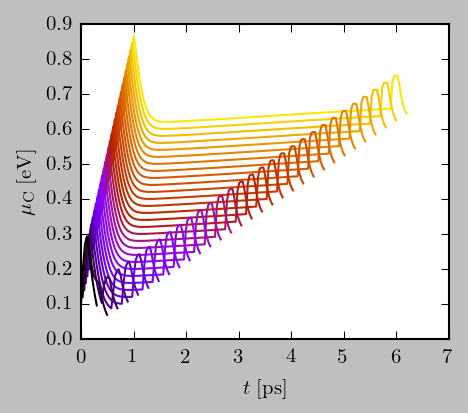

In [5]:
mpl.style.use(["classic", "latex"])
cmap = mpl.cm.get_cmap('gnuplot')
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
dx = 0.03
dy = 0.02
for irun,(tt, muC_t) in list(enumerate(zip(tt_list, muC_list)))[::-1]:
    plt.plot(tt * 1.0e-3 + irun * dx, muC_t + irun * dy, "-", color=cmap(irun/len(muC_list)))
#plt.xlim([0.0, 2.0])
#plt.ylim([0.0, 0.9])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$\mu_{\rm C}~[{\rm eV}]$")
plt.savefig("%s/plot_muC_wfl.png" % dataDir, dpi=300)

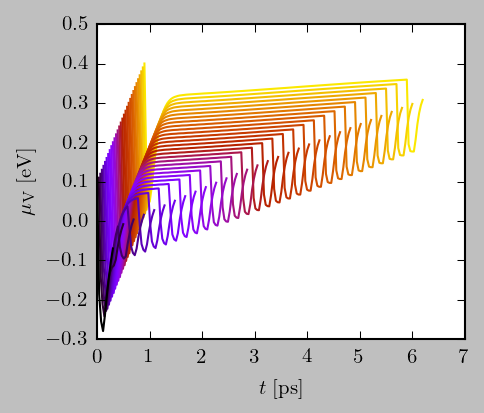

In [6]:
mpl.style.use(["classic", "latex"])
cmap = mpl.cm.get_cmap('gnuplot')
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
dx = 0.03
dy = 0.01
for irun,(tt, muV_t) in list(enumerate(zip(tt_list, muV_list)))[::-1]:
    plt.plot(tt * 1.0e-3 + irun * dx, muV_t + irun * dy, "-", color=cmap(irun/len(muV_list)))
#plt.xlim([0.0, 2.0])
#plt.ylim([-0.4, 0.9])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$\mu_{\rm V}~[{\rm eV}]$")
plt.savefig("%s/plot_muV_wfl.png" % dataDir, dpi=300)

In [ ]:
# Plot THG during the probe pulses.
thg_files = sorted(glob.glob("%s/thg-??.csv" % dataDir))
thg_list = []
for thg_file in thg_files:
    thg_list.append(np.loadtxt(thg_file, delimiter=","))
mpl.style.use(["classic", "latex"])
cmap = mpl.cm.get_cmap('gnuplot')

# Plot THG value.
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
dx = 5
dy = 5.0e-11
for i,thg in enumerate(thg_list):
    plt.plot(thg[:,0] - thg[0,0] + i*dx, thg[:,1] + i*dy, "-", color=cmap(i / len(thg_list)))
#plt.xlim([0.0, 10.0])
#plt.ylim([0.0, 1.0e-9])
plt.xlabel(r"$t - t_{0,{\rm pr}}~[{\rm fs}]$")
plt.ylabel(r"$\eta_{\rm THG}$");
plt.savefig("%s/plot_etaTHG_probes.png" % dataDir, dpi=300)

In [ ]:
# Plot temperature and chemical potentials just before and after the probe pulse
# as a function of pump-probe delay.
f_list = sorted(glob.glob("%s/params-??.json" % dataDir))
delay_list = []
pr_dt_list = []
for f_name in f_list:
    with open(f_name, "r") as f:
        p = json.load(f)
    delay_list.append(p["sysparams"]["pr_delay"])
    pr_dt_list.append(p["sysparams"]["pr_dt"])
delay_list = np.array(delay_list)
pr_dt_list = np.array(pr_dt_list)

In [ ]:
# Find the time-indices just before and after the probe pulse.
it_bef_list = []
it_aft_list = []
for tt, delay, dt in zip(tt_list,delay_list,pr_dt_list):
    it_bef_list.append(np.argmin(1.0 / (tt - delay + 1.0e-12)))
    it_aft_list.append(np.argmax(1.0 / (tt - (delay + dt + 1.0e-12))))

In [ ]:
# Check that the selected times correctly bracket the probe pulse.
brck = []
for irun in range(len(tt_list)):
    brck.append([tt_list[irun][it_bef_list[irun]],delay_list[irun],delay_list[irun]+pr_dt_list[irun],tt_list[irun][it_aft_list[irun]]])
for l in brck:
    print("%5.0f [%5.0f %5.0f] %5.0f" % (l[0], l[1], l[2], l[3]))

In [ ]:
temp_bef = []; temp_aft = []
muC_bef = []; muC_aft = []
muV_bef = []; muV_aft = []
for irun,(it_bef, it_aft) in enumerate(zip(it_bef_list,it_aft_list)):
    temp_bef.append(tempK_list[irun][it_bef_list[irun]])
    temp_aft.append(tempK_list[irun][it_aft_list[irun]])
    muC_bef.append(muC_list[irun][it_bef_list[irun]])
    muC_aft.append(muC_list[irun][it_aft_list[irun]])
    muV_bef.append(muV_list[irun][it_bef_list[irun]])
    muV_aft.append(muV_list[irun][it_aft_list[irun]])

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.plot(delay_list * 1.0e-3, temp_bef, "-or", ms=3.0, mew=0.0)
plt.plot(delay_list * 1.0e-3, temp_aft, "-ob", ms=3.0, mew=0.0)
# plt.xlim([0.0, 1.5])
# plt.ylim([0.0, 1.0e-9])
plt.xlabel(r"delay $[{\rm ps}]$")
plt.ylabel(r"$T_{\rm e}~[{\rm K}]$")
#plt.savefig("%s/plot_temp_pr_delay.png" % saveDir, dpi=300)

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.plot(delay_list * 1.0e-3, muC_bef, "-or", ms=3.0, mew=0.0)
plt.plot(delay_list * 1.0e-3, muC_aft, "-ob", ms=3.0, mew=0.0)
# plt.xlim([0.0, 1.5])
# plt.ylim([0.0, 0.25])
plt.xlabel(r"delay $[{\rm ps}]$")
plt.ylabel(r"$\mu_{\rm C}~[{\rm eV}]$")
#plt.savefig("%s/plot_muC_pr_delay.png" % saveDir, dpi=300)

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.plot(delay_list * 1.0e-3, muV_bef, "-or", ms=3.0, mew=0.0)
plt.plot(delay_list * 1.0e-3, muV_aft, "-ob", ms=3.0, mew=0.0)
# plt.xlim([0.0, 1.5])
# plt.ylim([0.0, 1.0e-9])
plt.xlabel(r"delay $[{\rm ps}]$")
plt.ylabel(r"$\mu_{\rm V}~[{\rm eV}]$")
#plt.savefig("%s/plot_muV_pr_delay.png" % saveDir, dpi=300)